In [1]:
from IPython.display import HTML
from IPython.display import Image

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import logging

handler = logging.basicConfig(level = logging.INFO)
lgr = logging.getLogger(__name__)

In [7]:
use_cuda = torch.cuda.is_available()

FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor

lgr.info("USE CUDA = " + str(use_cuda))

INFO:__main__:USE CUDA = True


In [8]:
def Rand(num):
    res = []
    for j in range(num):
        res.append(random.random())
    return res

In [9]:
nb_periods=10
nb_points=2600
x = np.linspace(-nb_periods*np.pi, nb_periods*np.pi, nb_points)
x2 = np.linspace(int(-nb_periods*np.pi/3), int(nb_periods*np.pi/3), int(nb_points/3))
aa=list(np.sin(x))
bb=list(np.zeros(int(nb_points/4)))
cc=list(np.sin(x2))
dd=list(np.arange(int(nb_points/4))/int(nb_points/-4))
ee=list(np.arange(int(nb_points/4))/int(nb_points/4))
y=list(np.arange(len(aa+aa+bb+cc+dd+aa)))

serie_simple=np.array(aa+aa+bb+cc+ee+cc+dd+aa)

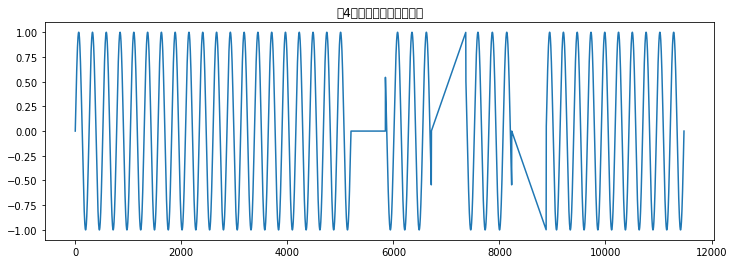

In [11]:
fig = plt.figure(figsize = (12, 4))
plt.plot(serie_simple)
plt.title("由4个模式组成的简单序列")
plt.show()

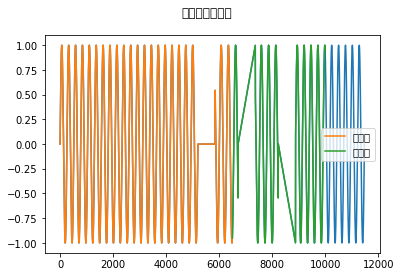

In [14]:
dataframe = pd.DataFrame(serie_simple.astype('float32'))
df_total=dataframe
plt.plot(df_total)

df= dataframe[:6500]
plt.plot(df,label="训练集")

df_test= dataframe[6500:10000]
plt.plot(df_test,label="测试集")
plt.legend()
plt.suptitle("时间序列的分解")
plt.show()

In [15]:
dataset = df.values
dataset_test = df_test.values